# Práctica 1 - Preparación de datos

En este ejercicio vamos a preparar un conjunto de datos para un posterior estudio. Utilizaremos el dataset del Titanic, que almacena una serie de atributos de 891 pasajeros que viajaron en el Titanic y la etiqueta objetivo de si sobrevivieron o no.


### Tarea 1: Importación de librerías, carga del dataset y eliminación de columnas redundantes. 

In [1]:
#Cargamos librerías necesarias para la realización de la práctica.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Cargar el dataset desde un enlace.
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv" 
midf = pd.read_csv(url)

In [3]:
#midf.keys() es equivalente a midf.columns
midf.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
#Se eliminarán las columnas Class, Who, Adult_male, Embark_town y Alive.
col_to_drop = ["class", "who", "adult_male", "embark_town", "alive"]
dfLimpio = midf.drop(columns=col_to_drop)
dfLimpio.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck', 'alone'],
      dtype='object')

### Tarea 2: Codificación de columnas de texto:

In [5]:
#La columna sex debe codificarse de forma numérica como entero, siendo 0 para hombre y 1 para mujer. 
dfLimpio["sex"] = dfLimpio["sex"].map({"male": 0, "female": 1})
# La columna Embarked debe codificarse de forma numérica como entero, siendo 0 para Cherbourg, 1 para Queenstown y 2 para Southampton.
dfLimpio["embarked"] = dfLimpio["embarked"].map({"C": 0, "Q": 1, "S": 2})
# La columna Deck debe codificarse de forma numérica como entero, siendo 0 para A, 1 para B, … y 6 para G. 
dfLimpio["deck"] = dfLimpio["deck"].map({"A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6})
# La columna Alone debe codificarse de forma numérica como entero, siendo 0 si no viajaba solo y 1 si viajaba solo. 
dfLimpio["alone"] = dfLimpio["alone"].map({False: 0, True: 1})


In [6]:
print (dfLimpio)

     survived  pclass  sex   age  sibsp  parch     fare  embarked  deck  alone
0           0       3    0  22.0      1      0   7.2500       2.0   NaN      0
1           1       1    1  38.0      1      0  71.2833       0.0   2.0      0
2           1       3    1  26.0      0      0   7.9250       2.0   NaN      1
3           1       1    1  35.0      1      0  53.1000       2.0   2.0      0
4           0       3    0  35.0      0      0   8.0500       2.0   NaN      1
..        ...     ...  ...   ...    ...    ...      ...       ...   ...    ...
886         0       2    0  27.0      0      0  13.0000       2.0   NaN      1
887         1       1    1  19.0      0      0  30.0000       2.0   1.0      1
888         0       3    1   NaN      1      2  23.4500       2.0   NaN      0
889         1       1    0  26.0      0      0  30.0000       0.0   2.0      1
890         0       3    0  32.0      0      0   7.7500       1.0   NaN      1

[891 rows x 10 columns]


### Tarea 3: Limpieza de datos vacíos  y de datos fuera de rango

Considera el siguiente rango como el rango correcto de los atributos:   
○ Survived: {0, 1}   
○ Pclass: {1, 2, 3}  
○ Sex: {0, 1}  
○ Age: [0-100]  
○ SibSp: [0-10]  
○ Parch: [0-10]  
○ Fare: >0  
○ Embarked {0, 1,2}  
○ Deck: {0, 1, 2, 3, 4, 5, 6}  
○ Alone: {0, 1}  

In [7]:
# columnas con rangos numéricos
numericos = {
    "age": (0, 100),
    "sibsp": (0, 10),
    "parch": (0, 10),
    "fare": (0, float("inf"))
}

# columnas con valores discretos
valores_dis = {
    "survived": [0, 1],
    "pclass": [1, 2, 3],
    "sex": [0, 1],
    "embarked": [0, 1, 2],
    "deck": [0,1,2,3,4,5,6],
    "alone": [0, 1]
}


He creado dos diccionarios: uno para las columnas numéricas (numericos) y otro para las columnas categóricas o discretas (valores_dis). En el diccionario de numéricos, para cada columna guardo el rango mínimo y máximo permitido, usando low y high.En el diccionario de categóricas, para cada columna guardo la lista de valores válidos que puede tomar esa columna. Luego, recorremos cada columna:

Para las columnas numéricas, compruebo si cada valor está dentro del rango usando between(low, high). Si el valor está fuera del rango, la fila se elimina. Para las columnas discretas, compruebo si cada valor pertenece a la lista de valores válidos usando isin(valid). Si el valor no está en la lista, la fila también se elimina.

De esta manera, aseguro que todas las filas que quedan en el DataFrame solo tienen valores válidos según los criterios que hemos definido en los diccionarios.

In [ ]:
#Calcular valores inválidos antes de filtrar filas
invalid_counts = {}

# columnas numéricas
for colum, (low, high) in numericos.items():
    if colum in dfLimpio.columns:
        invalid = dfLimpio[colum].isna() | ~dfLimpio[colum].between(low, high)
        invalid_counts[colum] = invalid.sum()

# columnas categóricas
for colum, valid in valores_dis.items():
    if colum in dfLimpio.columns:
        invalid = dfLimpio[colum].isna() | ~dfLimpio[colum].isin(valid)
        invalid_counts[colum] = invalid.sum()

# convertir a Series para calcular porcentaje
invalid_counts = pd.Series(invalid_counts)
percent_invalid = (invalid_counts / len(dfLimpio)) * 100

# mostrar tabla de inválidos
invalid_table = pd.DataFrame({
    "invalid_count": invalid_counts,
    "percent_invalid": percent_invalid
}).sort_values("percent_invalid", ascending=False)

print(invalid_table)




          invalid_count  percent_invalid
deck                688        77.216611
age                 177        19.865320
embarked              2         0.224467
sibsp                 0         0.000000
parch                 0         0.000000
fare                  0         0.000000
pclass                0         0.000000
survived              0         0.000000
sex                   0         0.000000
alone                 0         0.000000


In [ ]:
#Eliminar columnas con más del 25% de datos inválidos
cols_to_drop = invalid_table[invalid_table["percent_invalid"] > 25].index
dfLimpio = dfLimpio.drop(columns=cols_to_drop)

#Eliminar filas inválidas en columnas numéricas
for colum, (low, high) in numericos.items():
    if colum in dfLimpio.columns:
        dfLimpio = dfLimpio[dfLimpio[colum].between(low, high)]

#Eliminar filas inválidas en columnas categóricas
for colum, valid in valores_dis.items():
    if colum in dfLimpio.columns:
        dfLimpio = dfLimpio[dfLimpio[colum].isin(valid)]

In [12]:
print (dfLimpio)

     survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0           0       3    0  22.0      1      0   7.2500       2.0      0
1           1       1    1  38.0      1      0  71.2833       0.0      0
2           1       3    1  26.0      0      0   7.9250       2.0      1
3           1       1    1  35.0      1      0  53.1000       2.0      0
4           0       3    0  35.0      0      0   8.0500       2.0      1
..        ...     ...  ...   ...    ...    ...      ...       ...    ...
885         0       3    1  39.0      0      5  29.1250       1.0      0
886         0       2    0  27.0      0      0  13.0000       2.0      1
887         1       1    1  19.0      0      0  30.0000       2.0      1
889         1       1    0  26.0      0      0  30.0000       0.0      1
890         0       3    0  32.0      0      0   7.7500       1.0      1

[712 rows x 9 columns]


### Tarea 4: Cálculos estadísticos básicos.


4.1  Haz un análisis estadístico relacionando el atributo Sex con el target (Survived). Muestra datos numéricos y un gráfico similar a este:

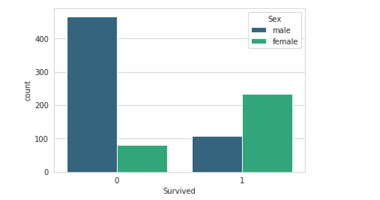

     total  supervivientes  tasa_supervivencia
sex                                           
0      453              93                21.0
1      259             195                75.0


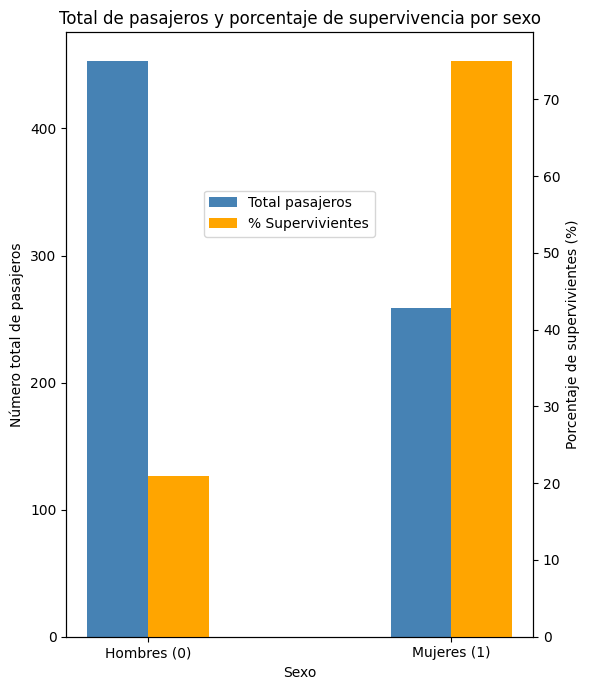

In [ ]:
# tabla supervivencia según sexo
estadisticas = dfLimpio.groupby("sex")["survived"].agg(
    total="count",
    supervivientes="sum",
    tasa_supervivencia="mean" 
)

estadisticas["tasa_supervivencia"] = estadisticas["tasa_supervivencia"].round(2) * 100

print(estadisticas)

#grafico con matplotlib
x = np.arange(len(estadisticas))
width = 0.2

fig, ax1 = plt.subplots(figsize=(6, 7))

# Eje Y izquierdo → total pasajeros
ax1.bar(
    x - width/2,
    estadisticas["total"],
    width,
    label="Total pasajeros",
    color="steelblue"
)
ax1.set_ylabel("Número total de pasajeros")
ax1.set_xlabel("Sexo")

# Eje Y derecho → % supervivientes
ax2 = ax1.twinx()
ax2.bar(
    x + width/2,
    estadisticas["tasa_supervivencia"],
    width,
    label="% Supervivientes",
    color="orange"
)
ax2.set_ylabel("Porcentaje de supervivientes (%)")

plt.xticks(x, ["Hombres (0)", "Mujeres (1)"])
plt.title("Total de pasajeros y porcentaje de supervivencia por sexo")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    handles1 + handles2,
    labels1 + labels2,
    loc="center left",
    bbox_to_anchor=(0.28, 0.7),
    fontsize=10
)

plt.tight_layout()
plt.show()


4.2 Haz un análisis estadístico relacionando el atributo Pclass con el target (Survived). Muestra datos numéricos y un gráfico similar al anterior. 

        total  supervivientes  tasa_supervivencia
pclass                                           
1         184             120                65.0
2         173              83                48.0
3         355              85                24.0


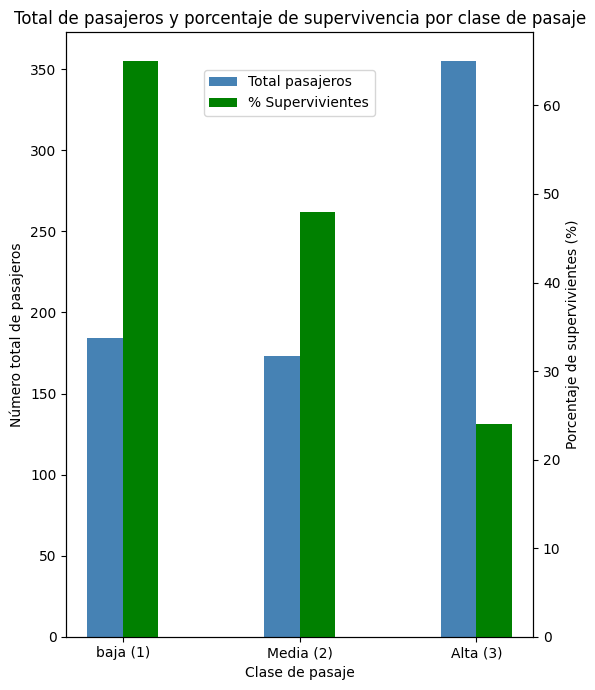

In [73]:
estadisticas = dfLimpio.groupby("pclass")["survived"].agg(
    total="count",
    supervivientes="sum",
    tasa_supervivencia="mean" 
)

estadisticas["tasa_supervivencia"] = estadisticas["tasa_supervivencia"].round(2) * 100

print (estadisticas)


x = np.arange(len(estadisticas))
width = 0.2

fig, ax1 = plt.subplots(figsize=(6, 7))

# Eje Y izquierdo → total pasajeros
ax1.bar(
    x - width/2,
    estadisticas["total"],
    width,
    label="Total pasajeros",
    color="steelblue"
)
ax1.set_ylabel("Número total de pasajeros")
ax1.set_xlabel("Clase de pasaje")

# Eje Y derecho → % supervivientes
ax2 = ax1.twinx()
ax2.bar(
    x + width/2,
    estadisticas["tasa_supervivencia"],
    width,
    label="% Supervivientes",
    color="green"
)
ax2.set_ylabel("Porcentaje de supervivientes (%)")

plt.xticks(x, ["baja (3)", "Media (2)", "Alta (1)"])
plt.title("Total de pasajeros y porcentaje de supervivencia por clase de pasaje")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(
    handles1 + handles2,
    labels1 + labels2,
    loc="center left",
    bbox_to_anchor=(0.28, 0.9),
    fontsize=10
)

plt.tight_layout()
plt.show()

4.3 Haz un análisis estadístico de la edad de los pasajeros que contenga, al menos, la media, la mediana, la desviación típica, el mínimo, el máximo, y los cuartiles Q1, Q2 y Q3. Representa la distribución de la edad de forma gráfica.

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


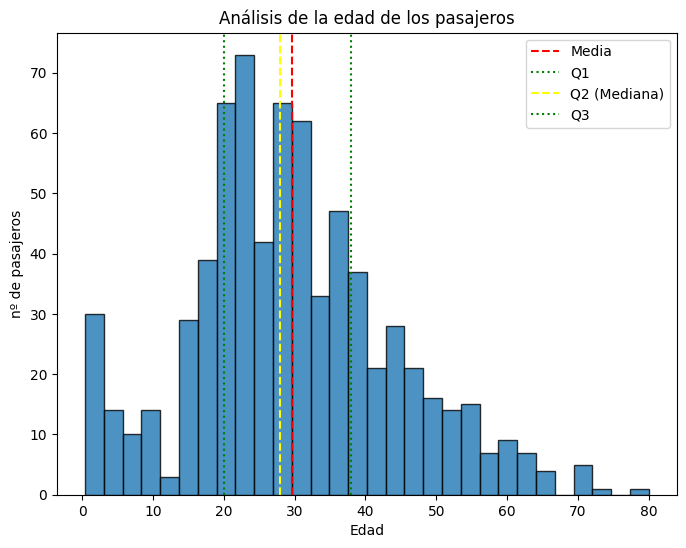

In [92]:
analisis = dfLimpio["age"].describe()
print(analisis)

media = dfLimpio["age"].mean()
q1 = dfLimpio["age"].quantile(0.25)
q2 = dfLimpio["age"].quantile(0.50)
q3 = dfLimpio["age"].quantile(0.75)

plt.figure(figsize=(8, 6))
plt.hist(
    dfLimpio["age"].dropna(),
    bins=30,
    edgecolor="black",
    alpha=0.8
)

plt.axvline(media, color="red", linestyle="--", label="Media")
plt.axvline(q1, color="green", linestyle=":", label="Q1")
plt.axvline(q2, color="yellow", linestyle="--", label="Q2 (Mediana)")
plt.axvline(q3, color="green", linestyle=":", label="Q3")


plt.xlabel("Edad")
plt.ylabel("nº de pasajeros")
plt.title("Análisis de la edad de los pasajeros")
plt.legend()
plt.show()

### Tarea 5: Escalamiento de los datos 

Escala todos los atributos por el método de estandarización por rangos (MinMaxScaler).

In [94]:
#vamos a importar nuevas librerias necesarias para este procesamiento.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import make_column_selector

In [98]:

numeric_cols = dfLimpio.select_dtypes(include=['float64', 'int']).columns.to_list()

preprocessor_MM = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_MM = preprocessor_MM.fit_transform(dfLimpio)

# obtener nombres de columnas tras el ColumnTransformer
column_names = preprocessor_MM.get_feature_names_out()

# convertir a DataFrame
df_MM = pd.DataFrame(Data_prep_MM, columns=column_names)


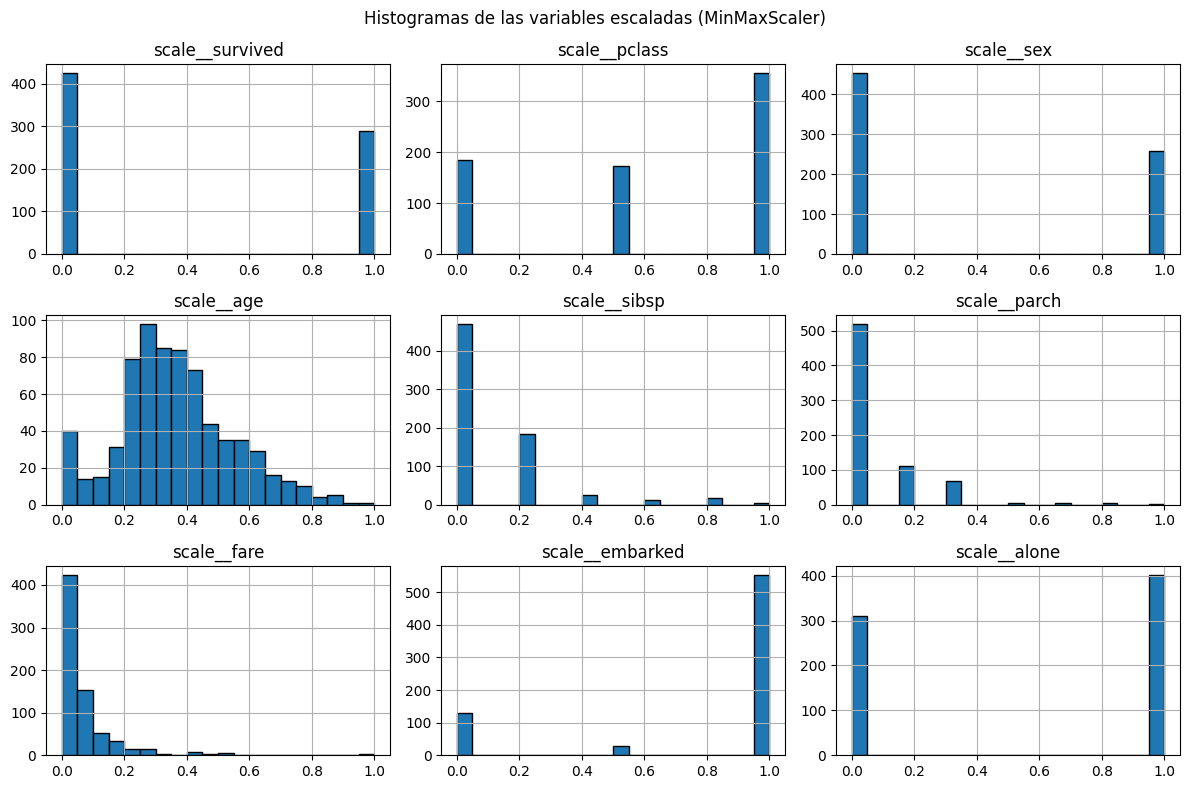

In [100]:

df_MM.hist(bins=20, figsize=(12, 8), edgecolor="black")
plt.suptitle("Histogramas de las variables escaladas (MinMaxScaler)")
plt.tight_layout()
plt.show()

### Tarea 6: Guarda el dataframe modificado en un fichero csv 


Guarda el dataframe con todas las modificaciones en tu disco local, con el nombre titanic_nombre_apellido1_apellido2.csv. Observa el siguiente ejemplo para exportar un dataframe a csv y descargarlo al disco local de tu PC: 

```python
from google.colab import files 
mi_dataframe.to_csv('mi_csv.csv') 
files.download('mi_csv.csv')
```

In [ ]:
dfLimpio.to_csv("titanic_Alejandro_Beiroa_Muñoz.csv", index=False)

In [ ]:
#solo ejecutar en google colab
from google.colab import files 
dfLimpio.to_csv('titanic_Alejandro_Beiroa_Muñoz.csv') 
files.download('titanic_Alejandro_Beiroa_Muñoz.csv')